In [1]:
"""TIME SERIES ANALYSIS- 
    A specific way to analyzing a sequence of data points collected 
over an interval of time (can be days, months, years, decades so on...).
Can help you get the trends or systemic patterns over the 
marked period. 
"""

'TIME SERIES ANALYSIS- \n    A specific way to analyzing a sequence of data points collected \nover an interval of time (can be days, months, years, decades so on...).\nCan help you get the trends or systemic patterns over the \nmarked period. \n'

In [2]:
#Importing the necessary Libraries and Modules
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("E:\COMPUTER SCIENCE\CSV Files\gold_monthly_csv.csv")
df.shape

(847, 2)

In [4]:
print(f"Date range of Gold Prices available from - {df.loc[:, 'Date'][0]} to {df.loc[:, 'Date'][len(df)-1]}")

Date range of Gold Prices available from - 1950-01 to 2020-07


In [5]:
date = pd.date_range(start = '1/1/1950',  end = '8/1/2020', freq= 'M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [6]:
df['month'] = date
df.drop("Date", axis= 1, inplace = True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


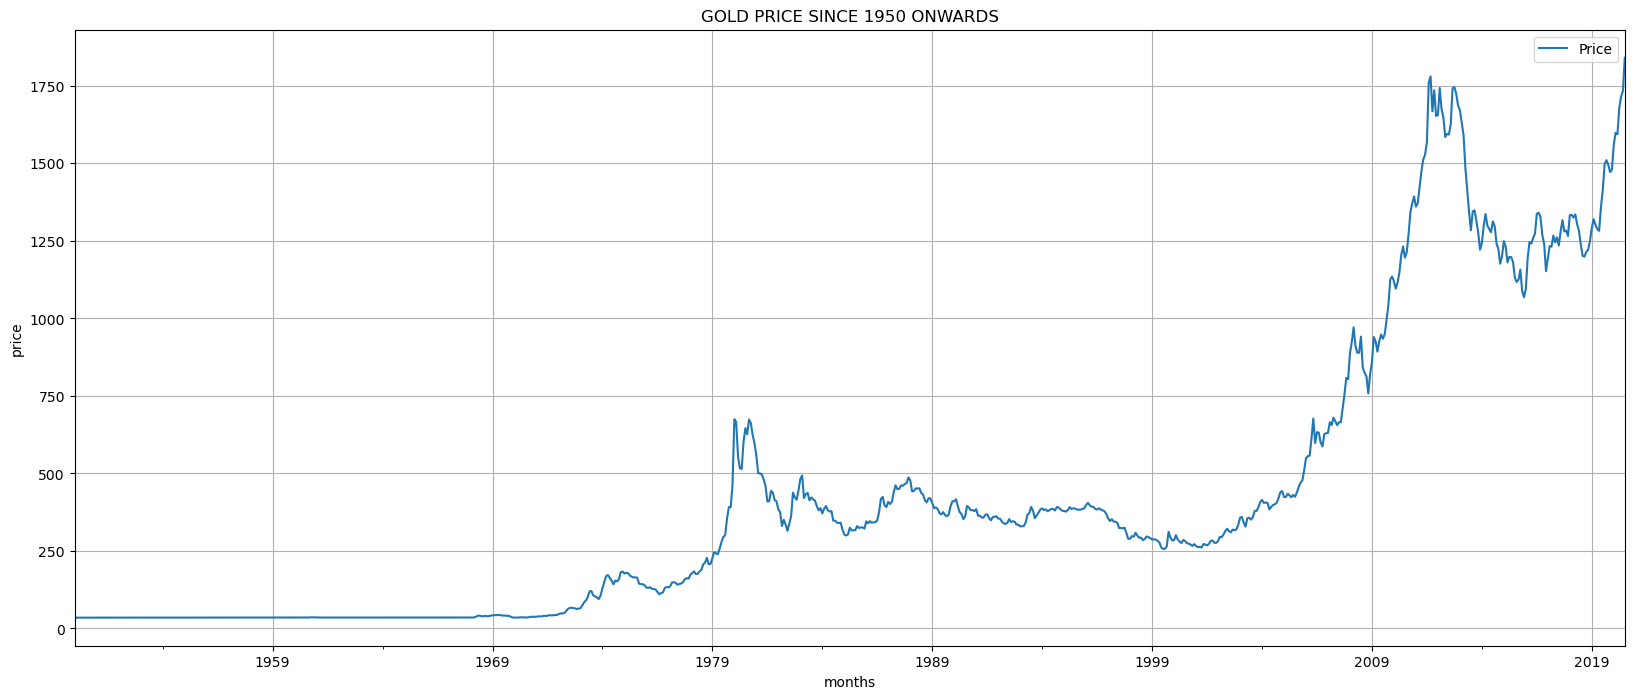

In [7]:
df.plot(figsize = (20, 8))
plt.title("GOLD PRICE SINCE 1950 ONWARDS")
plt.xlabel("months")
plt.ylabel("price")
plt.grid()

In [8]:
round(df.describe(), 3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


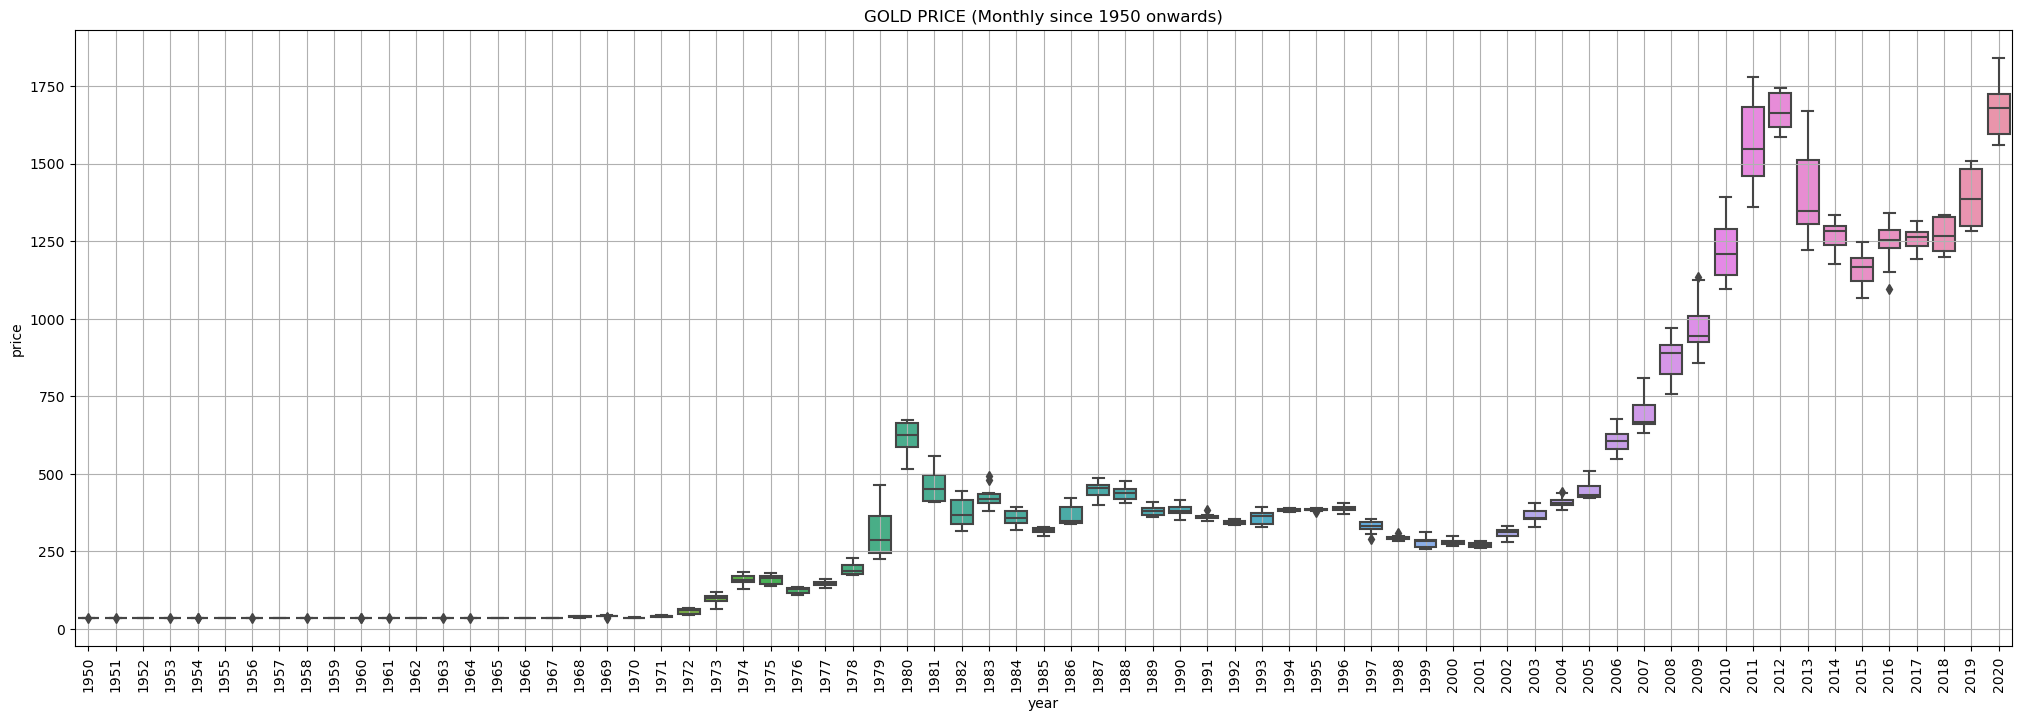

In [9]:
_, ax = plt.subplots(figsize = (25,8))
sns.boxplot(x = df.index.year, y = df.values[:, 0], ax = ax)
plt.title("GOLD PRICE (Monthly since 1950 onwards)")
plt.xlabel("year")
plt.ylabel("price")
plt.xticks(rotation = 90)
plt.grid()

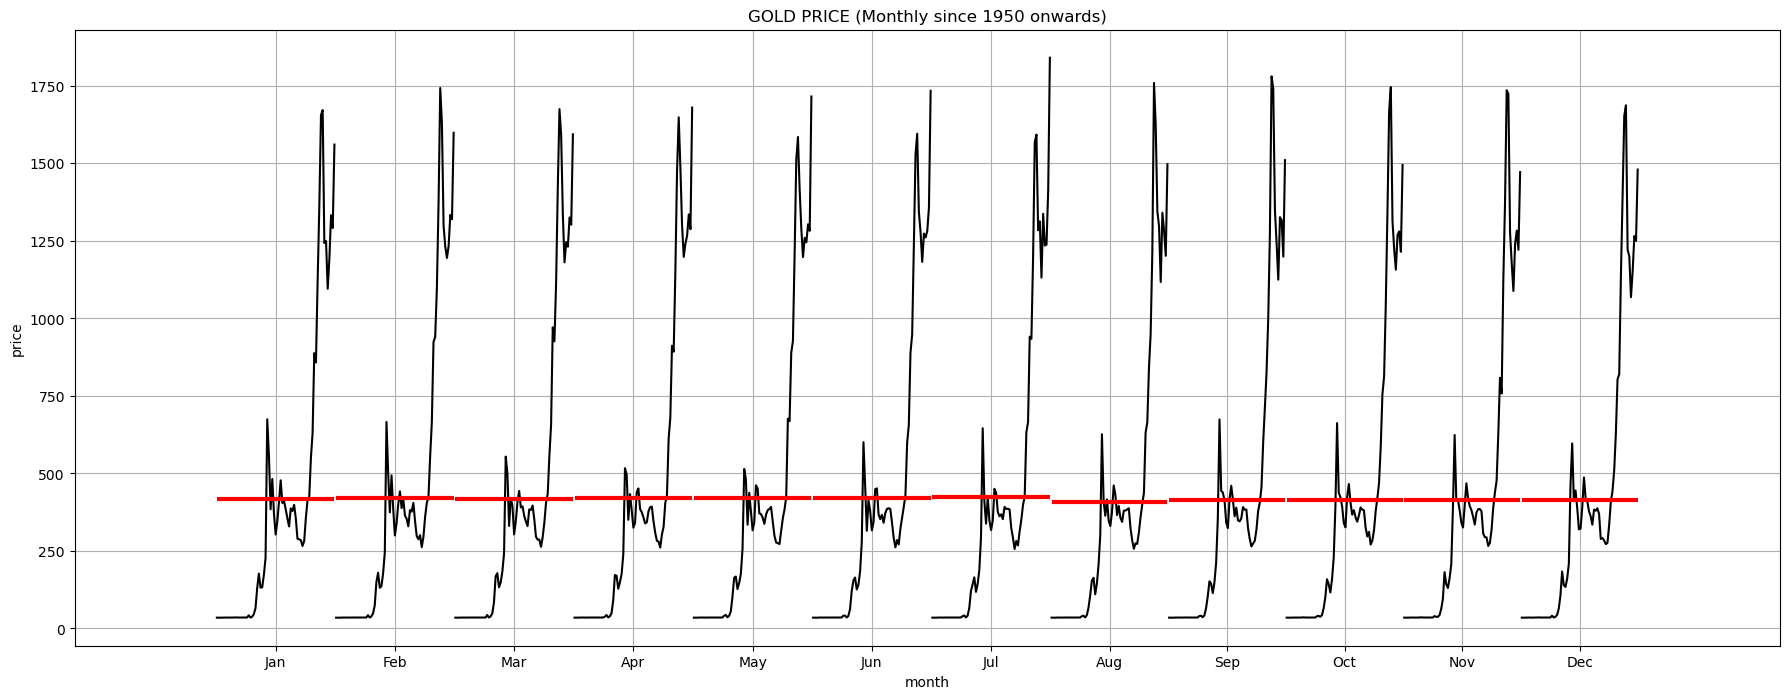

In [10]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax  = plt.subplots(figsize = (22, 8))
month_plot(df, ylabel = "gold price", ax = ax)
plt.title("GOLD PRICE (Monthly since 1950 onwards)")
plt.xlabel("month")
plt.ylabel("price")
plt.grid()

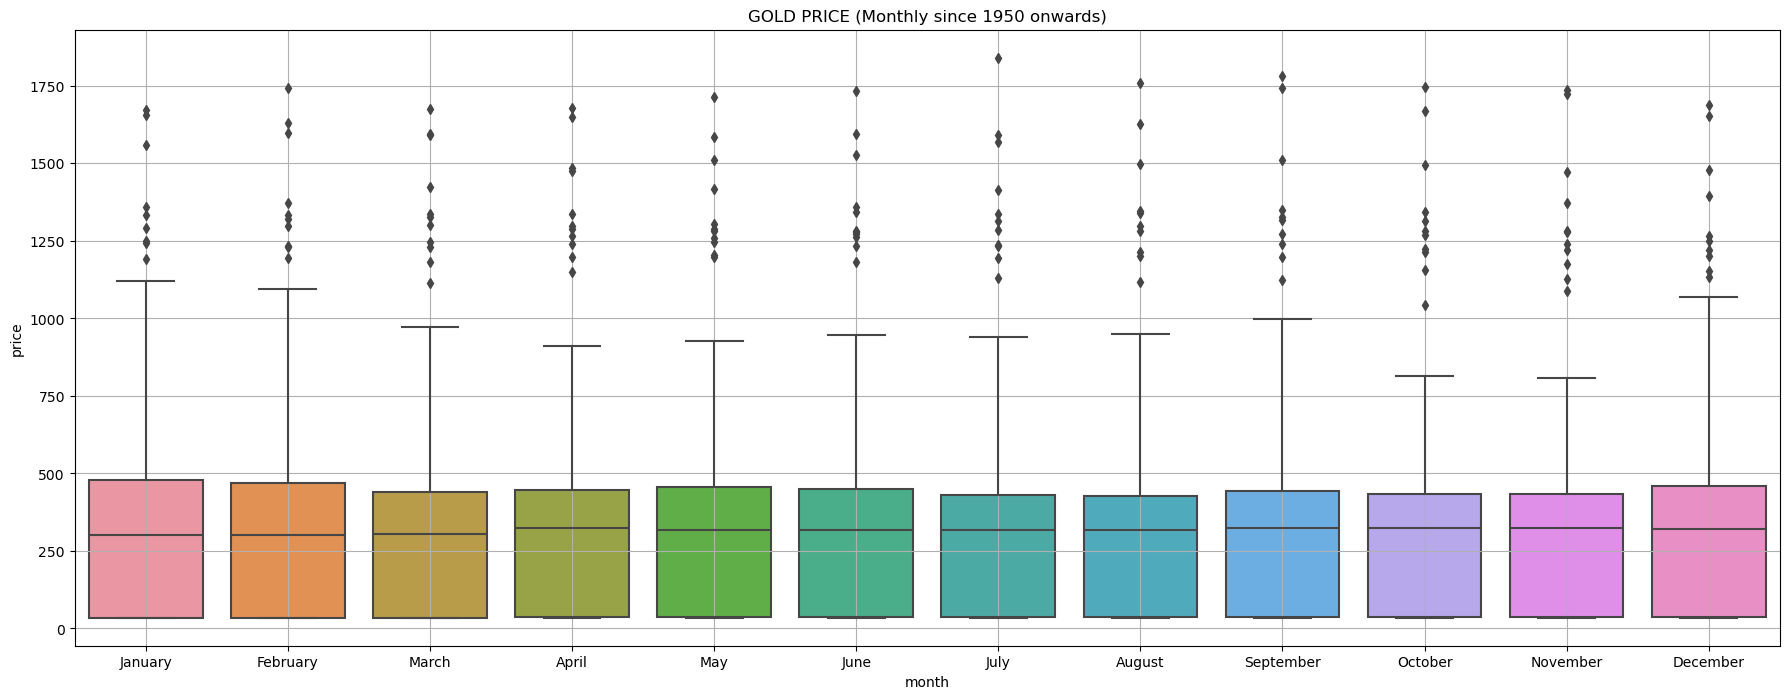

In [11]:
_, ax = plt.subplots(figsize = (22, 8))
sns.boxplot(x = df.index.month_name(), y = df.values[:, 0], ax  = ax)
plt.title("GOLD PRICE (Monthly since 1950 onwards)")
plt.xlabel("month")
plt.ylabel("price")
plt.grid()

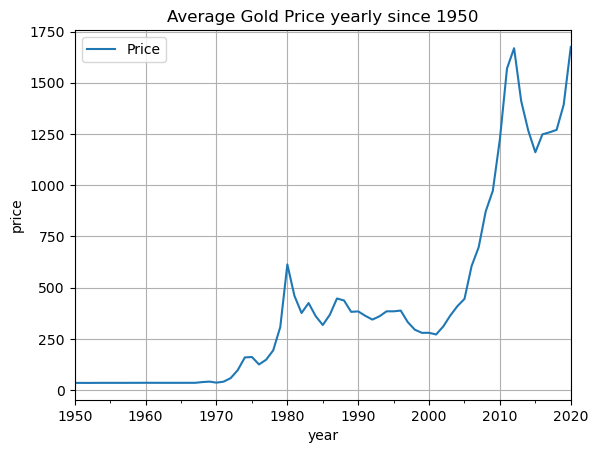

In [12]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title("Average Gold Price yearly since 1950")
plt.xlabel("year")
plt.ylabel("price")
plt.grid()

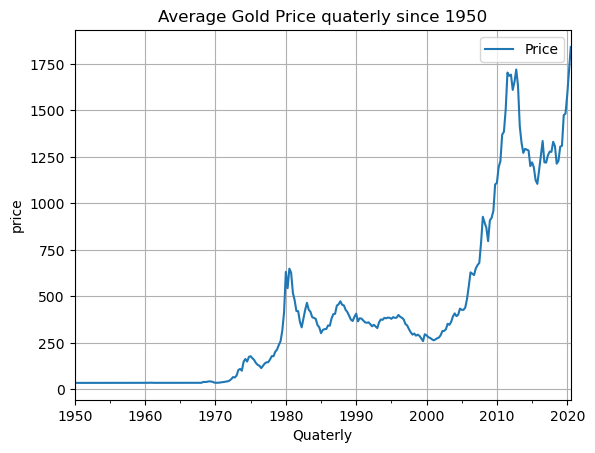

In [13]:
df_quaterly_sum = df.resample('Q').mean()
df_quaterly_sum.plot()
plt.title("Average Gold Price quaterly since 1950")
plt.xlabel("Quaterly")
plt.ylabel("price")
plt.grid()

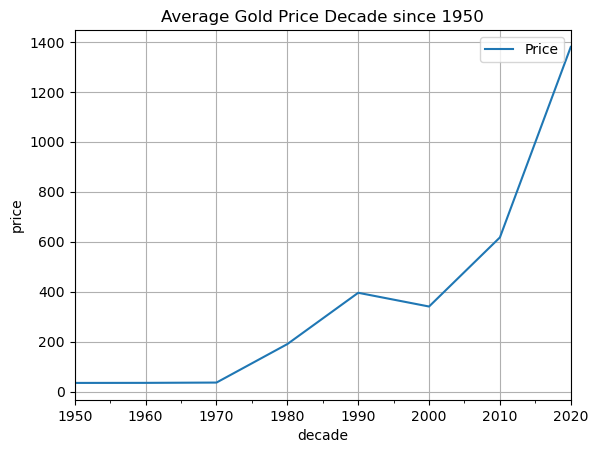

In [14]:
df_decade_sum = df.resample('10Y').mean()
df_decade_sum.plot()
plt.title("Average Gold Price Decade since 1950")
plt.xlabel("decade")
plt.ylabel("price")
plt.grid()

In [15]:
df_1 = df.groupby(df.index.year).mean().rename(columns  = {'Price' : 'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns = {'Price' : 'Std'}), left_index = True, right_index = True)
df_1['Cov_pct'] = (df_1['Std'] / df_1['Mean'] * 100).round(2)
df_1.head()

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


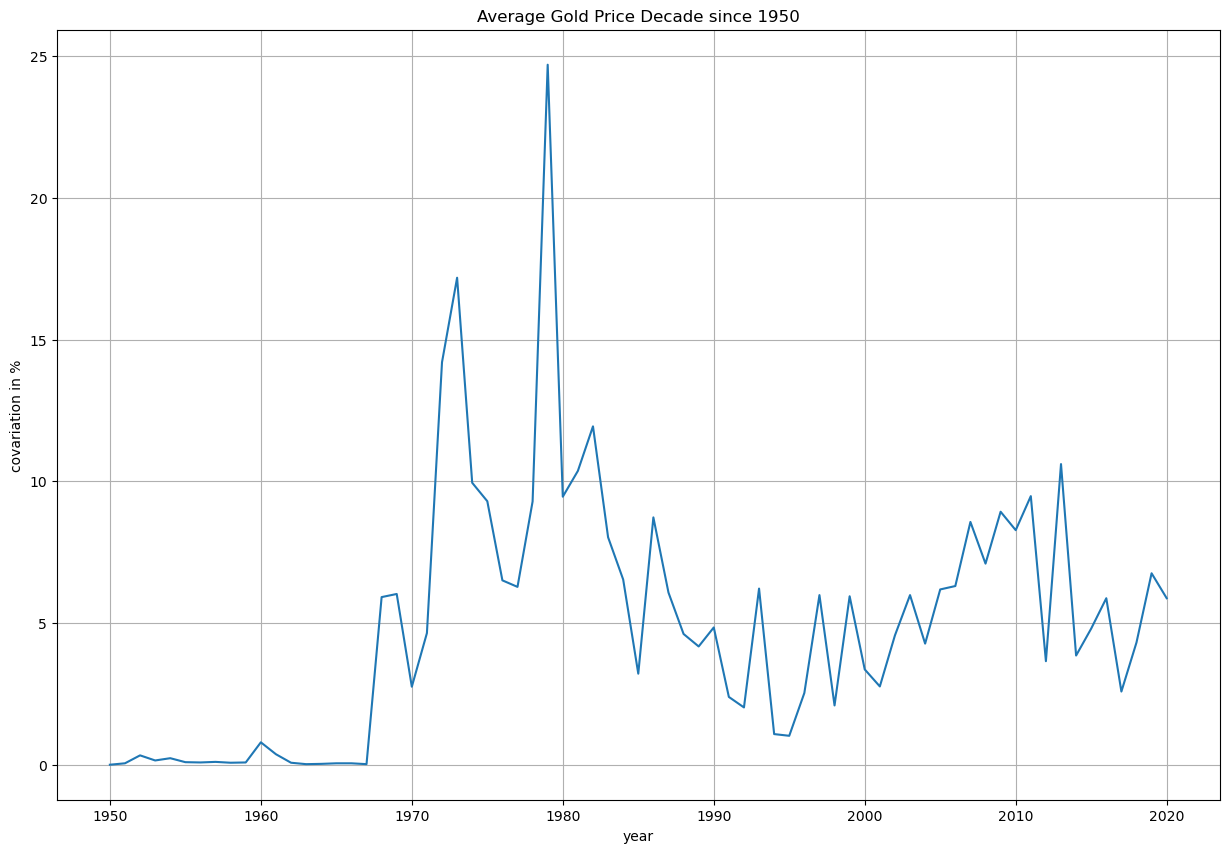

In [16]:
fig, ax = plt.subplots(figsize = (15, 10))
df_1['Cov_pct'].plot()
plt.title("Average Gold Price Decade since 1950")
plt.xlabel("year")
plt.ylabel("covariation in %")
plt.grid()

In [17]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [18]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


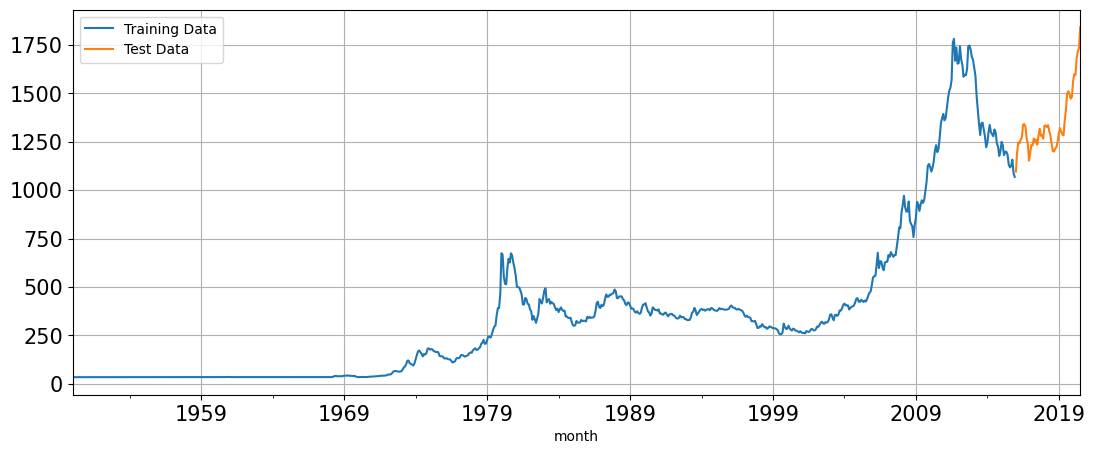

In [19]:
train['Price'].plot(figsize = (13, 5), fontsize = 15)
test["Price"].plot(figsize = (13, 5), fontsize = 15)
plt.grid()
plt.legend(["Training Data", "Test Data"])  #blue and orange split in graph itself is called legend
plt.show()

In [20]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [21]:
lr_train = train.copy()  #lr means Linear Regression
lr_test = test.copy()

In [22]:
lr_train['time'] = train_time
lr_test['time'] = test_time

In [23]:
lr = LinearRegression()
lr.fit(lr_train[['time']], lr_train["Price"].values)

LinearRegression()

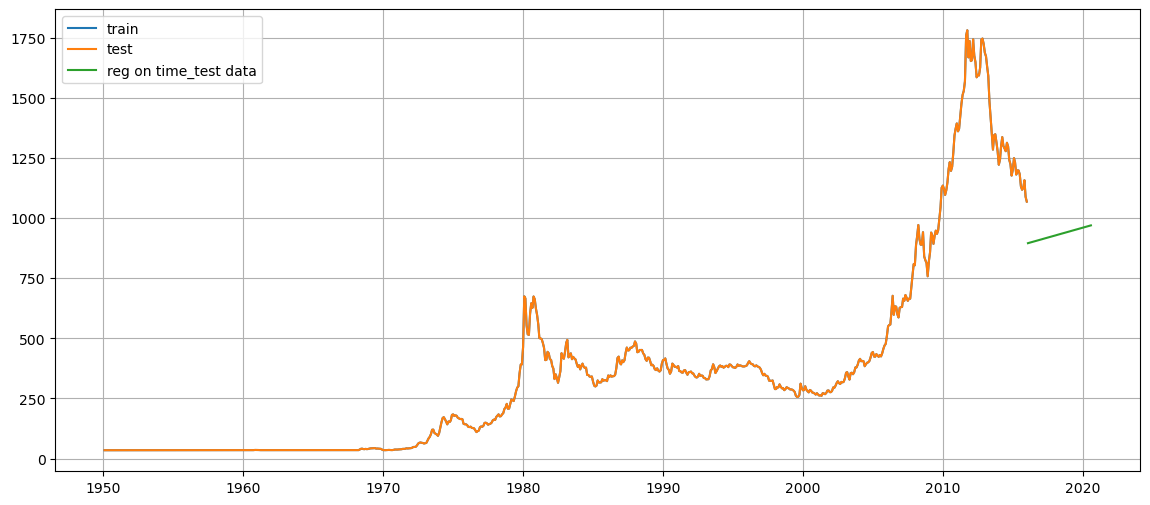

In [24]:
test_predictions_model = lr.predict(lr_test[['time']])
lr_test['forecast'] = test_predictions_model

plt.figure(figsize = (14, 6))
plt.plot(train['Price'], label = 'train')
plt.plot(train['Price'], label = 'test')
plt.plot(lr_test['forecast'], label = 'reg on time_test data')
plt.legend(loc = 'best')
plt.grid()

In [25]:
def mape(actual, pred) : 
    return round(np.mean(abs(actual - pred) / actual) * 100, 2)
#MAPE is a measure of accuracy of a forecasting method in statical model

In [26]:
mape_model_test = mape(test['Price'].values, test_predictions_model)
print("MAPE is %3.3f"%(mape_model_test), "%")

MAPE is 29.760 %


In [27]:
results = pd.DataFrame({"Test Mape (%)" : [mape_model_test]}, index = ["RegressionOnTime"])
results

,Test Mape (%)
RegressionOnTime,29.76


In [28]:
"""-----------------------------------------------------"""

'-----------------------------------------------------'

In [29]:
naive_train = train.copy()
naive_test = test.copy()

In [30]:
naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price'])) - 1]
naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

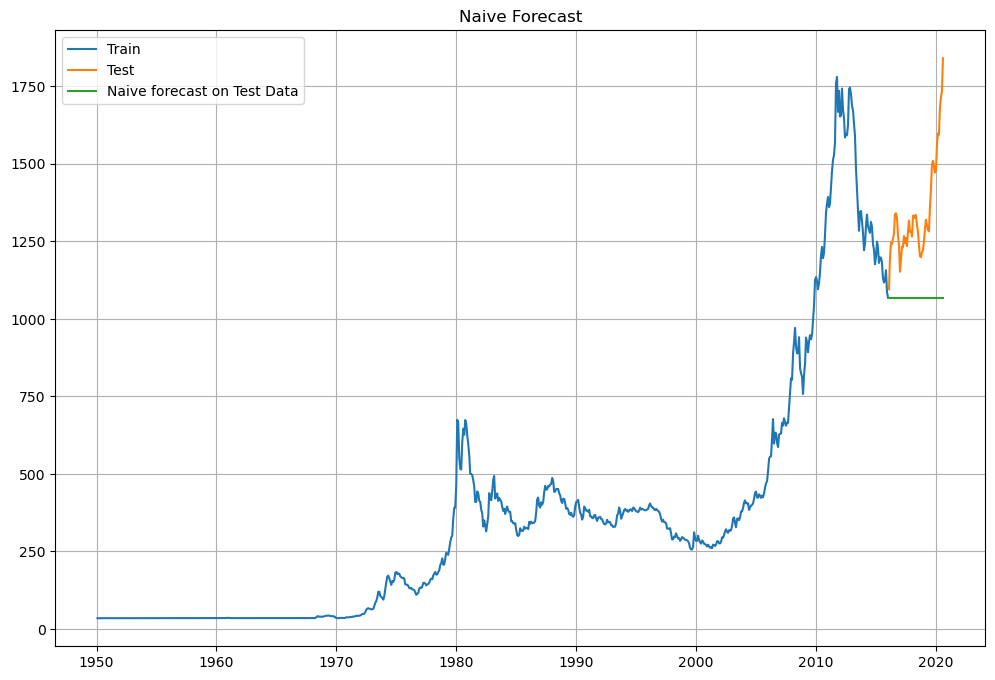

In [31]:
plt.figure(figsize = (12, 8))
plt.plot(naive_train['Price'], label="Train")
plt.plot(test['Price'], label="Test")
plt.plot(naive_test['naive'], label="Naive forecast on Test Data")
plt.legend(loc = 'best')
plt.title("Naive Forecast")
plt.grid()

In [32]:
#FINAL FORECASTING
final_model = ExponentialSmoothing(df,
                                  trend = 'additive',
                                  seasonal = 'additive').fit(smoothing_level = 0.4,
                                                            smoothing_trend = 0.3, 
                                                            smoothing_seasonal = 0.6)

In [33]:
mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE: " , mape_final_model)

MAPE:  17.24


In [34]:
predictions = final_model.forecast(steps = len(test))

In [35]:
pred_df = pd.DataFrame({'lower_ci' : predictions - 1.96 * np.std(final_model.resid, ddof= 1),
                                                               'prediction' : predictions,
                                                               'upper_ci': predictions + 1.96 * np.std(final_model.resid, ddof= 1)})

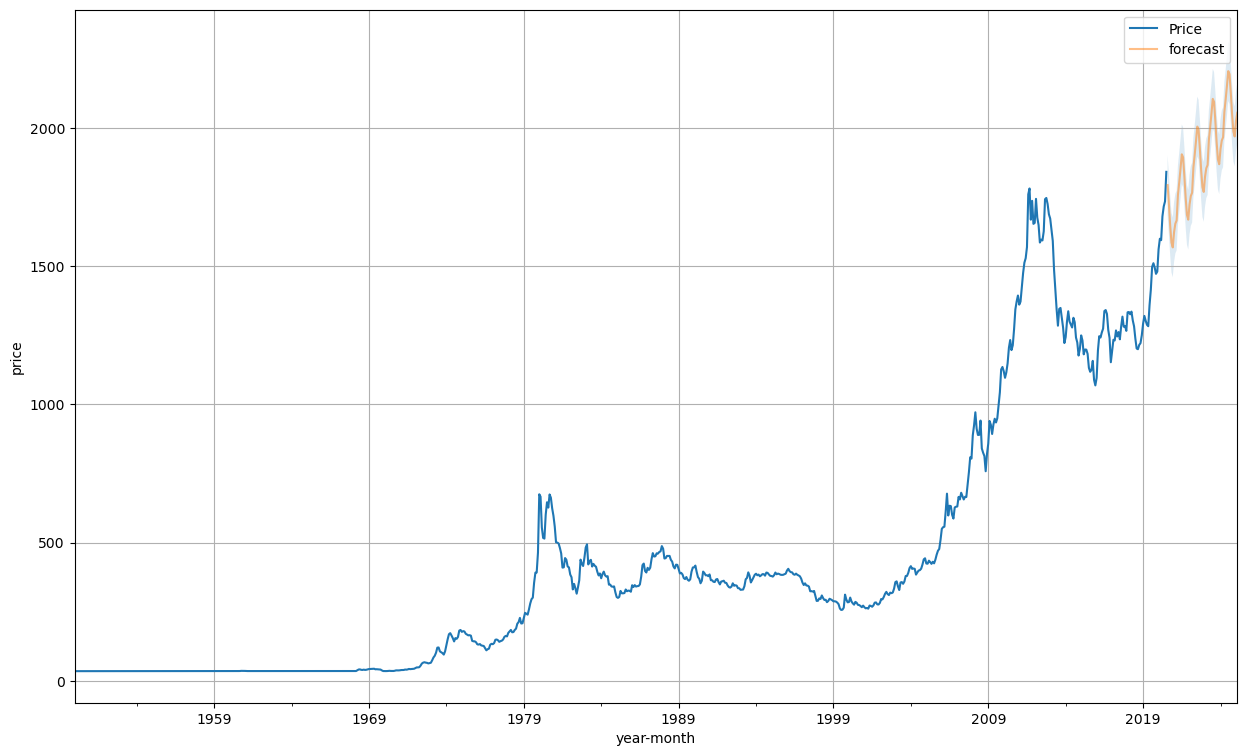

In [36]:
axis = df.plot(label = 'Actual', figsize = (15, 9))
pred_df['prediction'].plot(ax = axis, label = 'forecast', alpha = 0.5)
axis.fill_between(pred_df.index, pred_df['lower_ci'], pred_df['upper_ci'], 
                  alpha = .15)  #color = 'n'
axis.set_xlabel("year-month")
axis.set_ylabel("price")
plt.legend(loc = 'best')
plt.grid()
plt.show()